In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np

In [6]:
#grep "^DATA:" alder_Syria_French.log |grep "test status"| cut -f1-16 > alder_all.csv ## header
#grep -h "^DATA:" alder_*.log|grep -v "test status" >> alder_all.csv

wdir = '~/Dropbox/Yemen/YemenGenomeAnalysis/AdmixTools_Yemen_HO_OOA_geno05/Alder/'
alderlog=f'{wdir}alder_all.csv'
alder = pd.read_csv(alderlog, sep='\t').iloc[:,1:]
alder1 = alder[alder['test status'].str.contains("success")]
selcols = [3, 4,5,6,7,9,11,13]
top20 = alder1.iloc[:,selcols].sort_values('2-ref z-score', ascending=False).head(20)
#print(top20.to_latex(index=False).replace('+/-', '$\\pm$'))
alder1.sort_values('2-ref amp_exp', ascending=False)

,test status,p-value,test pop,ref A,ref B,2-ref z-score,1-ref z-score A,1-ref z-score B,max decay diff %,2-ref decay,2-ref amp_exp,1-ref decay A,1-ref amp_exp A,1-ref decay B,1-ref amp_exp B
20,success (warning: decay rates inconsistent),2.100000e-14,Yemen,French,Yoruba,7.64,3.59,7.64,142%,23.81 +/- 3.11,0.00020287 +/- 0.00001105,127.75 +/- 35.56,0.00002081 +/- 0.00000536,21.78 +/- 2.85,0.00017576 +/- 0.00001052
22,success (warning: decay rates inconsistent),7.000000e-13,Yemen,GUMUZ,French,7.18,6.97,3.59,137%,26.72 +/- 3.72,0.00018842 +/- 0.00001243,24.07 +/- 3.45,0.00016094 +/- 0.00001235,127.75 +/- 35.56,0.00002081 +/- 0.00000536
71,success (warning: decay rates inconsistent),1.800000e-16,Yemen,Syria,Yoruba,8.23,2.66,7.64,151%,23.22 +/- 2.82,0.00018527 +/- 0.00000949,157.40 +/- 42.33,0.00001441 +/- 0.00000542,21.78 +/- 2.85,0.00017576 +/- 0.00001052
35,success (warning: decay rates inconsistent),7.900000e-18,Yemen,Iran,Yoruba,8.60,2.50,7.64,128%,23.55 +/- 2.74,0.00017524 +/- 0.00000915,99.25 +/- 39.63,0.00001593 +/- 0.00000612,21.78 +/- 2.85,0.00017576 +/- 0.00001052
24,success (warning: decay rates inconsistent),4.700000e-15,Yemen,GUMUZ,Syria,7.83,6.97,2.66,147%,26.11 +/- 3.33,0.00017168 +/- 0.00001013,24.07 +/- 3.45,0.00016094 +/- 0.00001235,157.40 +/- 42.33,0.00001441 +/- 0.00000542
59,success (warning: decay rates inconsistent),2.700000e-15,Yemen,Palestine,Yoruba,7.90,2.49,7.64,156%,22.47 +/- 2.84,0.00016580 +/- 0.00000922,174.41 +/- 53.34,0.00001193 +/- 0.00000479,21.78 +/- 2.85,0.00017576 +/- 0.00001052
29,success (warning: decay rates inconsistent),2.000000e-16,Yemen,Iran,GUMUZ,8.22,2.50,6.97,122%,26.56 +/- 3.23,0.00016302 +/- 0.00000996,99.25 +/- 39.63,0.00001593 +/- 0.00000612,24.07 +/- 3.45,0.00016094 +/- 0.00001235
52,success (warning: decay rates inconsistent),3.700000e-14,Yemen,Palestine,GUMUZ,7.57,2.49,6.97,151%,25.38 +/- 3.35,0.00015294 +/- 0.00000967,174.41 +/- 53.34,0.00001193 +/- 0.00000479,24.07 +/- 3.45,0.00016094 +/- 0.00001235
12,success (warning: decay rates inconsistent),7.000000e-16,Yemen,Egyptian,Yoruba,8.07,2.88,7.64,75%,22.99 +/- 2.85,0.00014951 +/- 0.00000785,47.80 +/- 16.62,0.00000526 +/- 0.00000137,21.78 +/- 2.85,0.00017576 +/- 0.00001052
19,success (warning: decay rates inconsistent),1.700000e-15,Yemen,EGYPT,Yoruba,7.96,2.55,7.64,91%,21.72 +/- 2.73,0.00014490 +/- 0.00000769,57.90 +/- 22.69,0.00000498 +/- 0.00000186,21.78 +/- 2.85,0.00017576 +/- 0.00001052


In [4]:
def plotDecay(refA='', refB='', threshold=10):
    log = f'{wdir}alder_{refA}_{refB}.log'
    raw = f'{wdir}alder.raw_{refA}_{refB}_Yemen.txt'
    decay = pd.read_csv(raw, sep='\t', comment='#', header=None).iloc[:-1]
    decay = decay.apply(pd.to_numeric, errors='coerce')
    decay.columns = ['Distance', 'Weighted LD', 'nr pairs']
    decay = decay[decay.Distance < threshold]
    return decay


<AxesSubplot:title={'center':'2-ref Weighted LD with weights EGYPT-WOLAYTA'}, xlabel='Distance', ylabel='Weighted LD'>

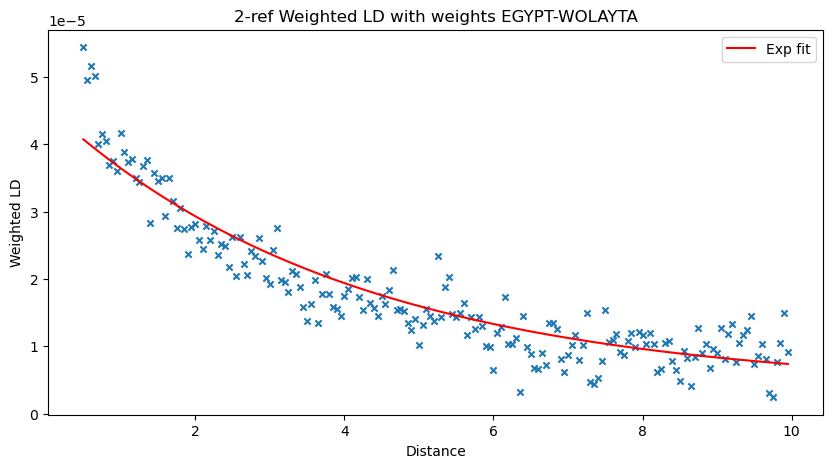

In [5]:
refA = 'EGYPT'; refB = 'WOLAYTA'
decay = plotDecay(refA = refA, refB = refB)
ax = decay.plot.scatter(x='Distance', y='Weighted LD', figsize=(10, 5), title=f'2-ref Weighted LD with weights {refA}-{refB}', marker='x')
n = 24.61
M = 0.00004178
K = 0.00000378
decay['prdv'] = M * np.exp(-n*decay.Distance/100) + K
decay.plot(x='Distance', y='prdv', kind='line', color='r', ax=ax, label='Exp fit')



In [82]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = False

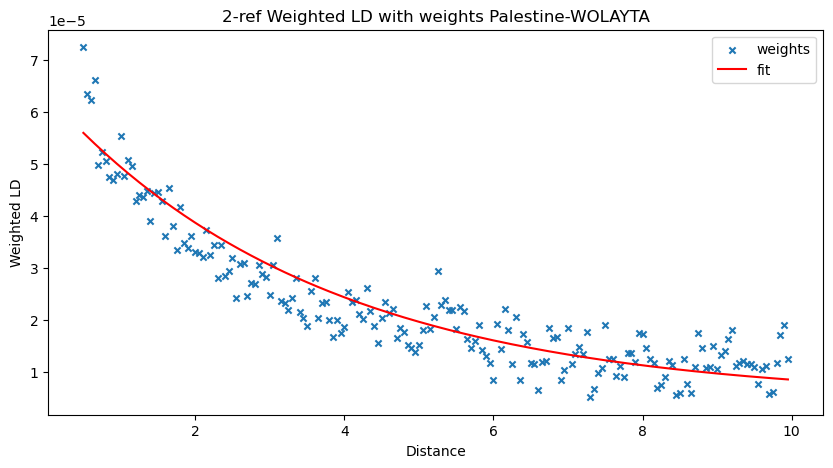

In [7]:

refA = 'Palestine' 
refB = 'WOLAYTA'
decay = plotDecay(refA = refA, refB = refB)
ax = decay.plot.scatter(x='Distance', y='Weighted LD', figsize=(10, 5), title=f'2-ref Weighted LD with weights {refA}-{refB}', marker='x', label='weights')
#n = 24.2
#M = 0.00005258 ## amp_exp
#K = 0.00000474 ## amp_aff
#decay['prdv'] = M * np.exp(-n*decay.Distance/100) + K
#ax = decay.plot(x='Distance', y='prdv', kind='line', color='r', ax=ax, label='Exp fit')
n = 27.4
M = 0.00005871 ## amp_exp
K = 0.00000474 ## amp_aff
decay['prdv2'] = M * np.exp(-n*decay.Distance/100) + K
ax = decay.plot(x='Distance', y='prdv2', kind='line', color='r', ax=ax, label='fit') #r'Decay 27.4 \pm 2.99 fit d>0.3'

In [12]:
fig = ax.get_figure()
fig.savefig('alder_pal_wol.pdf')

In [13]:
!pwd

/home/ahenschel/Dropbox/Yemen/YemenGenomeAnalysis/Notebooks


<AxesSubplot:title={'center':'2-ref Weighted LD with weights WOLAYTA-Egyptian'}, xlabel='Distance', ylabel='Weighted LD'>

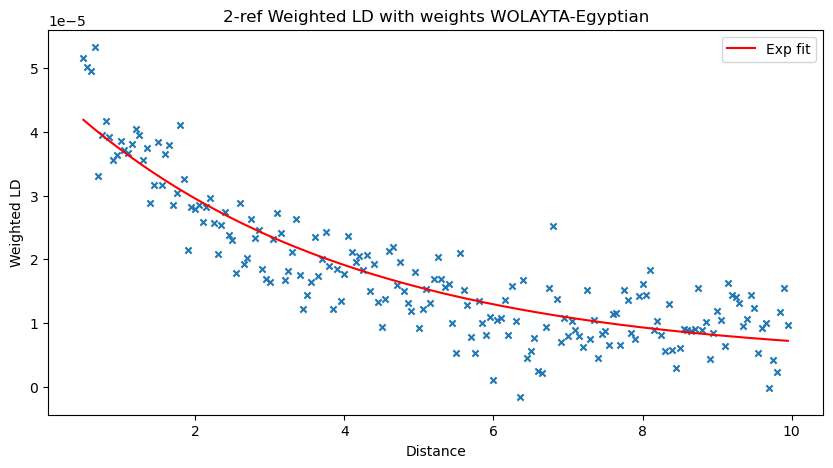

In [75]:
refB = 'Egyptian'; refA = 'WOLAYTA'
decay = plotDecay(refA=refA, refB=refB)
ax = decay.plot.scatter(x='Distance', y='Weighted LD', figsize=(10, 5), title=f'2-ref Weighted LD with weights {refA}-{refB}', marker='x')
n = 26.38
M = 0.00004306
K = 0.00000412
decay['prdv'] = M * np.exp(-n*decay.Distance/100) + K
decay.plot(x='Distance', y='prdv', kind='line', color='r', ax=ax, label='Exp fit')

<AxesSubplot:title={'center':'2-ref Weighted LD with weights Iran-WOLAYTA'}, xlabel='Distance', ylabel='Weighted LD'>

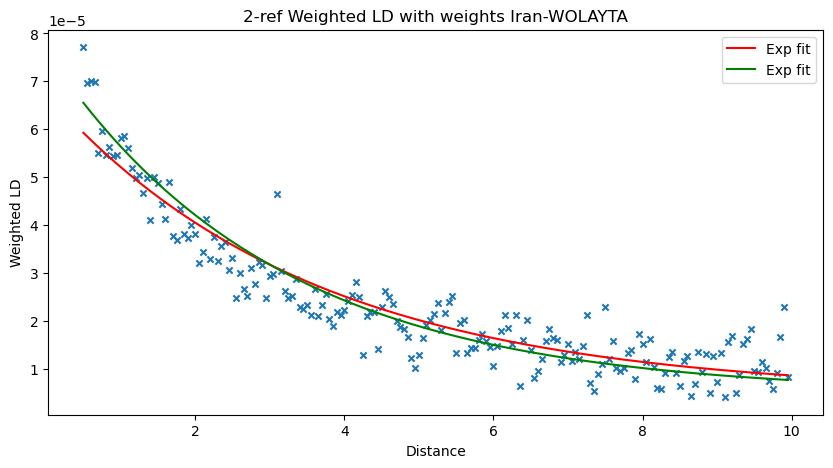

In [77]:
refA = 'Iran'; refB = 'WOLAYTA'
decay = plotDecay(refA=refA, refB=refB)
ax = decay.plot.scatter(x='Distance', y='Weighted LD', figsize=(10, 5), title=f'2-ref Weighted LD with weights {refA}-{refB}', marker='x')
n = 28.21
M = 0.00006264
K = 0.00000486
decay['prdv'] = M * np.exp(-n*decay.Distance/100) + K
decay.plot(x='Distance', y='prdv', kind='line', color='r', ax=ax, label='Exp fit')

n1 = 32.56
M1 = 0.00007138
K1 = 0.00000486
decay['prdv2'] = M1 * np.exp(-n1*decay.Distance/100) + K1
decay.plot(x='Distance', y='prdv2', kind='line', color='g', ax=ax, label='Exp fit')

In [60]:
s = sorted(set(list(alder1['ref A']) + list(alder1['ref B'])))
print (', '.join(s))

AMHARA, EGYPT, Egyptian, French, GUMUZ, Iran, OROMO, Palestine, SOMALI, Syria, WOLAYTA, Yoruba
